<a href="https://colab.research.google.com/github/hmm0403/vue-todo/blob/main/transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import the necessary data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Importing our TensorFlow libraries
from math import sqrt
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from sklearn.preprocessing import MinMaxScaler

In [2]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [3]:
#Import the data set as a pandas DataFrame
df = pd.read_excel('입력_임실_토마토 생육일지.xlsx', sheet_name='Sheet1').iloc[1: , :]

In [4]:
#Import the data set as a pandas DataFrame
df1 = pd.read_excel('라벨_임실_토마토_생육일지.xlsx', sheet_name='Sheet1').iloc[1: , :]

In [5]:
print(df)

             날짜       시:분  온도 (℃)  습도 (%)  CO2 (ppm)  일사 (w/㎡)
1    2017-10-20  00:05:00    18.5    90.9      647.0       6.8
2    2017-10-20  00:15:00    18.5    90.7      651.0       6.8
3    2017-10-20  00:25:00    18.4    90.8      646.5       6.8
4    2017-10-20  00:35:00    18.4    90.9      659.0       6.8
5    2017-10-20  00:45:00    18.3    90.9      653.5       6.8
...         ...       ...     ...     ...        ...       ...
5372 2018-02-08  23:15:00    16.3    77.9      539.5       7.3
5373 2018-02-08  23:25:00    16.3    77.9      543.5       7.1
5374 2018-02-08  23:35:00    16.3    77.9      541.5       6.8
5375 2018-02-08  23:45:00    16.3    77.9      549.0       7.1
5376 2018-02-08  23:55:00    16.2    77.9      547.0       6.8

[5376 rows x 6 columns]


In [6]:
print(df1)

        Date  DeltaS3
1 2017-10-27     30.0
2 2017-11-03     27.0
3 2018-01-26     19.0
4 2018-02-02     28.0


In [7]:
dataset = df.drop(["날짜", "시:분"], axis=1)
dataset

,온도 (℃),습도 (%),CO2 (ppm),일사 (w/㎡)
1,18.5,90.9,647.0,6.8
2,18.5,90.7,651.0,6.8
3,18.4,90.8,646.5,6.8
4,18.4,90.9,659.0,6.8
5,18.3,90.9,653.5,6.8
...,...,...,...,...
5372,16.3,77.9,539.5,7.3
5373,16.3,77.9,543.5,7.1
5374,16.3,77.9,541.5,6.8
5375,16.3,77.9,549.0,7.1


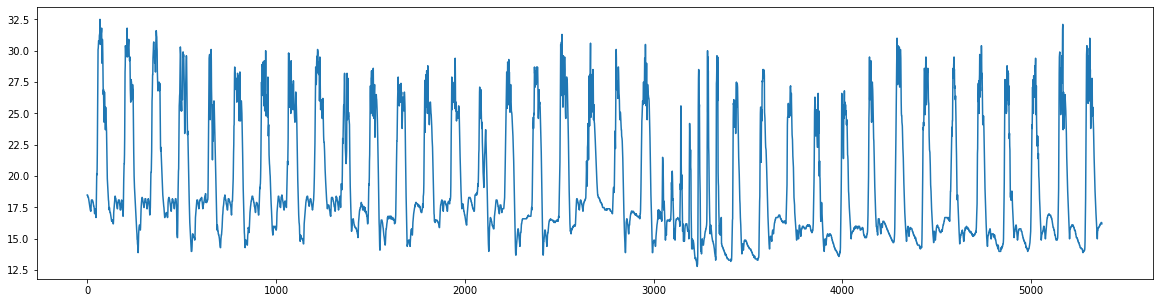

In [8]:
plt.figure(figsize=(20,5))
plt.plot(range(len(dataset)), dataset["온도 (℃)"])

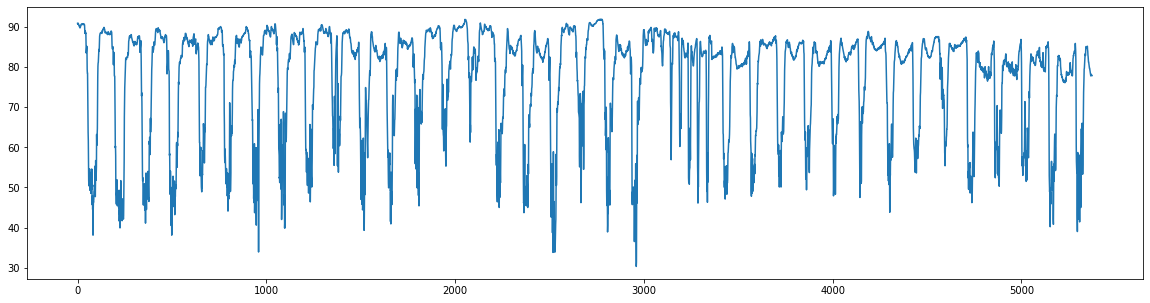

In [9]:
plt.figure(figsize=(20,5))
plt.plot(range(len(dataset)), dataset["습도 (%)"])

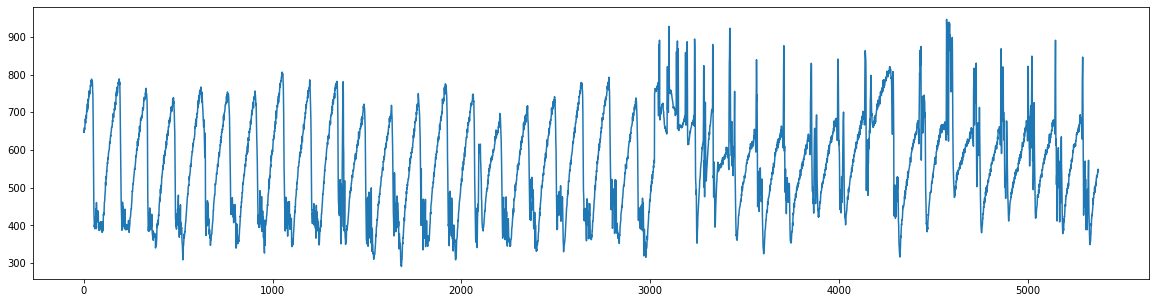

In [10]:
plt.figure(figsize=(20,5))
plt.plot(range(len(dataset)), dataset["CO2 (ppm)"])

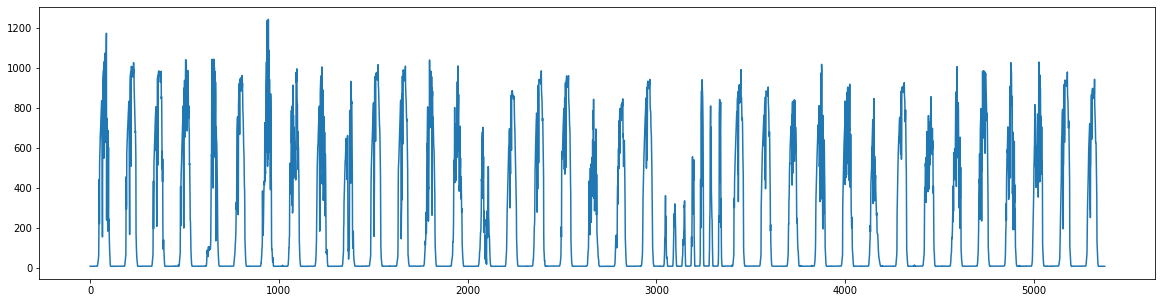

In [11]:
plt.figure(figsize=(20,5))
plt.plot(range(len(dataset)), dataset["일사 (w/㎡)"])

In [12]:
values = dataset.values

In [13]:
print(values)

[[ 18.5  90.9 647.    6.8]
 [ 18.5  90.7 651.    6.8]
 [ 18.4  90.8 646.5   6.8]
 ...
 [ 16.3  77.9 541.5   6.8]
 [ 16.3  77.9 549.    7.1]
 [ 16.2  77.9 547.    6.8]]


In [14]:
# ensure all data is float
values = values.astype('float32')
values

array([[ 18.5,  90.9, 647. ,   6.8],
       [ 18.5,  90.7, 651. ,   6.8],
       [ 18.4,  90.8, 646.5,   6.8],
       ...,
       [ 16.3,  77.9, 541.5,   6.8],
       [ 16.3,  77.9, 549. ,   7.1],
       [ 16.2,  77.9, 547. ,   6.8]], dtype=float32)

In [15]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
scaled

array([[2.8934008e-01, 9.8376626e-01, 5.4309690e-01, 7.2880415e-04],
       [2.8934008e-01, 9.8051947e-01, 5.4919910e-01, 7.2880415e-04],
       [2.8426391e-01, 9.8214298e-01, 5.4233414e-01, 7.2880415e-04],
       ...,
       [1.7766494e-01, 7.7272731e-01, 3.8215107e-01, 7.2880415e-04],
       [1.7766494e-01, 7.7272731e-01, 3.9359272e-01, 9.7173825e-04],
       [1.7258888e-01, 7.7272731e-01, 3.9054161e-01, 7.2880415e-04]],
      dtype=float32)

In [18]:
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var1(t),var2(t),var3(t),var4(t)
1,0.289340,0.983766,0.543097,0.000729,0.289340,0.980519,0.549199,0.000729
2,0.289340,0.980519,0.549199,0.000729,0.284264,0.982143,0.542334,0.000729
3,0.284264,0.982143,0.542334,0.000729,0.284264,0.983766,0.561404,0.000729
4,0.284264,0.983766,0.561404,0.000729,0.279188,0.983766,0.553013,0.000729
5,0.279188,0.983766,0.553013,0.000729,0.279188,0.978896,0.555301,0.000972
...,...,...,...,...,...,...,...,...
5371,0.172589,0.777597,0.369947,0.000972,0.177665,0.772727,0.379100,0.001134
5372,0.177665,0.772727,0.379100,0.001134,0.177665,0.772727,0.385202,0.000972
5373,0.177665,0.772727,0.385202,0.000972,0.177665,0.772727,0.382151,0.000729
5374,0.177665,0.772727,0.382151,0.000729,0.177665,0.772727,0.393593,0.000972


In [51]:
# split into train and test sets
values = reframed.values
train = values[:1008, :]
test = values[1008:, :]

In [52]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [53]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1008, 1, 7) (1008,) (4367, 1, 7) (4367,)


In [54]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# ###
# root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

# x_train, y_train = readucr("입력_임실_토마토 생육일지_20170818_20180331_1.csv")
# x_test, y_test = readucr(root_url + "FordA_TEST.tsv")


# #x_train, y_train = readucr(root_url + "입력_임실_토마토 생육일지_20170818_20180331_1.csv")
# #x_test, y_test = readucr(root_url + "라벨_임실_토마토 생육일지_20170818_20180331_ver4.csv")
# ###

In [55]:

from tensorflow import keras
from tensorflow.keras import layers

In [56]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [57]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1, activation="softmax")(x)
    #outputs = layers.Dense(n_classes, activation="softmax")(x)
    return keras.Model(inputs, outputs)

In [58]:
input_shape = train_X.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["sparse_categorical_accuracy"],
)
model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

model.fit(
    train_X,
    train_y,
    validation_split=0.2,
    epochs=200,
    batch_size=64,
    callbacks=callbacks,
)

#

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 1, 7)]       0           []                               
                                                                                                  
 layer_normalization_40 (LayerN  (None, 1, 7)        14          ['input_6[0][0]']                
 ormalization)                                                                                    
                                                                                                  
 multi_head_attention_20 (Multi  (None, 1, 7)        31751       ['layer_normalization_40[0][0]', 
 HeadAttention)                                                   'layer_normalization_40[0][0]'] 
                                                                                            

In [59]:
model.evaluate(test_X, test_y, verbose=1)

137/137 [==============================] - 1s 5ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 2.2899e-04


[0.0, 0.00022899016039445996]